『統計的テキストモデル』持橋大地著, 岩波書店 (2025)
# 5章 文書の統計モデル

In [31]:
# ライブラリと環境の準備
import os
import sys
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'

In [ ]:
# MeCabのインストール
!pip install mecab-python3
!pip install unidic-lite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658817 sha256=a19b070b8e7bfcdc98d66f7c2173e5d8fc3e36254e8c5be642811434825508a6
  Stored in directory: /root/.cache/pip/wheels/b7/fd/e9/ea4459b868e6d2902e8d80e82dbacb6203e05b3b3a58c64966
Successfully built unidic-lite


In [32]:
sys.path.append (os.getcwd() + '/bin')
%env PATH={os.getcwd()+'/bin'}:{os.environ['PATH']}
%matplotlib inline

env: PATH=/content/bin:/content/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [37]:
# スクリプトとデータの準備
!curl -O http://chasen.org/~daiti-m/textmodel/doc/doc.tar.gz
!tar xvfz doc.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112M  100  112M    0     0  10.2M      0  0:00:10  0:00:10 --:--:-- 10.3M
doc.ipynb
bin/
bin/nb-debug.py
bin/docvec-search.py
bin/tuplot.py
bin/ldaplot.py
bin/nbprobs.py
bin/umshow.py
bin/dmeval.py
bin/uniqueness++.py
bin/recur.py
bin/nbplot.py
bin/reviews.py
bin/docvec-word2vec.py
bin/nbshow.py
bin/nbinf.py
bin/nbprob.py
bin/ldashow.py
bin/umplot.py
bin/poch.py
bin/holmes.py
bin/util.py
bin/rutil.py
bin/livedoor.py
bin/nbwords.py
bin/nblabels.py
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
bin/docmatrix.py
bin/docvec.py
bin/coherence.py
bin/docvec-similar.py
bin/ldappls.py
bin/um.py
bin/bum.py
bin/ldashow-npmi.py
bin/pnplot.py
bin/umtest.py
bin/putil.py
bin/morph.py
bin/dm.py
bin/uniqueness.py
bin/text2data.py
bin/eprint.py
bin/icavec.py
bin/wposterior.py
bin/docvec-plot.py
bin/s

## 5.1　ナイーブベイズ法と単語集合表現

In [ ]:
!curl -O https://www.rondhuit.com/download/ldcc-20140209.tar.gz
!tar xfz ldcc-20140209.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8647k  100 8647k    0     0  1364k      0  0:00:06  0:00:06 --:--:-- 2052k


In [ ]:
!livedoor.py text data/livedoor.txt

preparsing done.
parsing done.
writing to data/livedoor.txt..
done.


In [ ]:
!nblabels.py data/livedoor.txt

dokujo-tsushin	0.1181
it-life-hack	0.1181
kaden-channel	0.1173
livedoor-homme	0.0694
movie-enter 	0.1181
peachy      	0.1143
smax        	0.1181
sports-watch	0.1222
topic-news  	0.1045


In [ ]:
!nbprob.py data/livedoor.txt peachy 40

の	-> 0.045954
、	-> 0.045769
に	-> 0.031669
。	-> 0.028758
を	-> 0.027222
て	-> 0.023651
は	-> 0.021012
が	-> 0.020681
で	-> 0.018894
と	-> 0.018578
た	-> 0.014799
し	-> 0.014155
「	-> 0.012861
」	-> 0.012836
も	-> 0.012251
な	-> 0.009405
・	-> 0.008011
ます	-> 0.007996
です	-> 0.006926
)	-> 0.006842
(	-> 0.006770
.	-> 0.006048
!	-> 0.005571
お	-> 0.005512
:	-> 0.004822
から	-> 0.004704
か	-> 0.004508
や	-> 0.004021
さ	-> 0.003998
する	-> 0.003972
いる	-> 0.003898
ない	-> 0.003711
い	-> 0.003667
れ	-> 0.003447
こと	-> 0.003374
?	-> 0.003154
日	-> 0.003120
さん	-> 0.002999
1	-> 0.002933
まし	-> 0.002905
月	-> 0.002815


In [ ]:
!nb.py data/livedoor.txt model/nb.livedoor

N = 7367 docs, V = 18924 vocabs, K = 9 classes.
alpha = 0.01, threshold = 10.
saving model to model/nb.livedoor.. done.


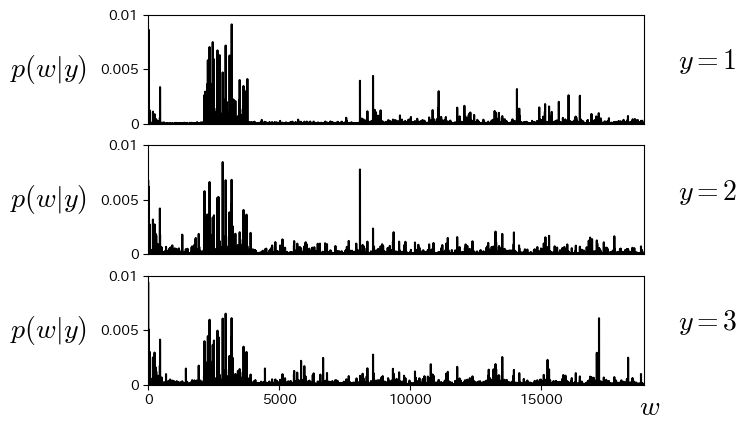

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/nbplot.py model/nb.livedoor

In [ ]:
!nbwords.py model/nb.livedoor 劇場 恋愛 Mac 携帯 ゴルフ 肌

[category]       :  劇場   恋愛   Mac  携帯   ゴルフ  肌   
dokujo-tsushin   :   0.8  47.8   0.2   9.7   0.8  15.2
it-life-hack     :   0.0   0.3  83.3  14.9   1.0   0.3
kaden-channel    :   1.3   2.0   9.7  33.6   1.7   6.7
livedoor-homme   :   0.6   1.8   3.5   6.1  79.0   2.5
movie-enter      :  88.1   8.8   0.0   1.5   0.2   1.5
peachy           :   3.5  30.5   0.0   3.2   2.2  71.1
smax             :   1.6   0.1   3.3  24.0   0.9   0.1
sports-watch     :   0.0   2.1   0.0   2.0  13.4   2.1
topic-news       :   4.1   6.5   0.0   5.1   0.8   0.5


### 5.1.1 文書の分類確率

ナイーブベイズ法の実験

In [ ]:
!split.py data/livedoor.txt data/livedoor

In [ ]:
!nb.py data/livedoor.train model/nb.livedoor

N = 5888 docs, V = 16698 vocabs, K = 9 classes.
alpha = 0.01, threshold = 10.
saving model to model/nb.livedoor.. done.


In [ ]:
!cat data/nb.txt

-	誕生 日 に ディナー で プレゼント を もらっ た ！ 


In [ ]:
!nbinf.py model/nb.livedoor data/nb.txt

{'sports-watch': 0, 'smax': 1, 'kaden-channel': 2, 'livedoor-homme': 3, 'movie-enter': 4, 'it-life-hack': 5, 'dokujo-tsushin': 6, 'peachy': 7, 'topic-news': 8}
- [ 0.000  0.000  0.002  0.011  0.068  0.000  0.008  0.911  0.000] 誕生日にディナーでプレゼントをもらった！


In [ ]:
!nbeval.py model/nb.livedoor data/livedoor.test

accuracy = 91.66%


テキストの感情極性分類

In [ ]:
!pip install neologdn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neologdn: filename=neologdn-0.5.4-cp311-cp311-linux_x86_64.whl size=231433 sha256=0a3eb6d177bc1690fc3e577a92155097dec036c5c11e34b94034a066fb6a3b8f
  Stored in directory: /root/.cache/pip/wheels/4b/0e/04/6fe075d8dbc3c114a0bcbab6f5c4201283d66ba59e89bbad8a
Successfully built neologdn


In [ ]:
%cd data

/content/data


In [ ]:
![ -d wrime ] && rm -r wrime
!git clone https://github.com/ids-cv/wrime
!wrime.py wrime/wrime-ver2.tsv > wrime.txt

Cloning into 'wrime'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 90 (delta 37), reused 63 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 5.24 MiB | 5.46 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
!shuf wrime.txt | head -3

positive	今日 から 県外 へ の お 出かけ が 可能 _( ' ω ' )_
negative	正月 休み に 帰省 し て ある 話 を 聞い て から 正直 呆れ た (-_-;)
positive	秒 で 予約 し た わ


In [ ]:
!ls -l

total 260136
-rw-r--r-- 1  501 staff      106 Apr 13  2024 capital-labor.ja
-rw-r--r-- 1  501 staff  3151142 Apr 16  2024 defense.dat
-rw-r--r-- 1  501 staff    21945 Apr 17  2024 defense.label
-rw-r--r-- 1  501 staff  1992309 Apr 17  2024 defense.txt
drwxr-xr-x 5  501 staff     4096 Jun 25 13:29 diet
-rw-r--r-- 1  501 staff    24488 Nov 14  2024 education2.label
-rw-r--r-- 1  501 staff  2275744 Nov 14  2024 education2.txt
-rw-r--r-- 1  501 staff  2554032 Apr 16  2024 education.dat
-rw-r--r-- 1  501 staff    15996 Apr 17  2024 education.label
-rw-r--r-- 1  501 staff  1708485 Apr 17  2024 education.txt
-rw-r--r-- 1  501 staff    85878 Apr  8  2023 holmes.dic
-rw-r--r-- 1  501 staff   591388 Aug  7  2007 holmes.txt
-rw-r--r-- 1  501 staff 90384345 Jun  3  2021 ja.text8.txt
-rw-r--r-- 1  501 staff  1899679 Feb 12  2023 jawiki.dat
-rw-r--r-- 1  501 staff    97557 Feb 12  2023 jawiki.lex
-rw-r--r-- 1  501 staff  1899679 Jun 17  2023 jawiki.shuffled.dat
-rw-r--r-- 1  501 staff    97508 Jun 1

In [ ]:
!shuf wrime.txt > wrime.shuffled.txt
!head -8000 wrime.shuffled.txt > wrime.train
!tail -740 wrime.shuffled.txt > wrime.test

In [ ]:
%cd ..

/content


In [ ]:
!nb.py data/wrime.train model/nb.wrime

N = 8000 docs, V = 1701 vocabs, K = 2 classes.
alpha = 0.01, threshold = 10.
saving model to model/nb.wrime.. done.


In [ ]:
!nbinf.py model/nb.wrime data/wrime.test

{'positive': 0, 'negative': 1}
negative [ 0.000  1.000] 8時過ぎくらいから寝てたよ…8時間くらい寝た
negative [ 0.029  0.971] 毎日夢見るけど毎日悪夢なのどうにかして
negative [ 0.073  0.927] つぶやき。闇が一番深いのは夜明け前。辛いときもある
negative [ 0.004  0.996] 一人旅は別に良いと思うけど、お酒飲むと気性
negative [ 0.621  0.379] 会社の先輩(女)から嫌われすぎていて面白いど
positive [ 0.965  0.035] オンライン飲み会とかオンライン会議とかしないから、企業
negative [ 0.076  0.924] キャンセル料は損金扱いかなぁ
negative [ 0.114  0.886] あー、また来た。こわい。
negative [ 0.134  0.866] 年齢知らないけど大丈夫なのかね
negative [ 0.934  0.066] ビール2本片付けて仕事も片付けましたわそろそろまた飲酒を
positive [ 0.979  0.021] 一緒に働けてよかったっていってもらえて、やっぱりこれから
negative [ 0.038  0.962] 女子の集団行動は怖いよー(´Д｀)いまでも
negative [ 0.051  0.949] 朝9時頃に親戚が来て起きてしもた。うまく
negative [ 0.212  0.788] おい、じいさん。閉店間際とかなんとか教えてくれ
negative [ 0.286  0.714] サラリーマンをディスるのは違うと思うんだよなぁ。あと、
negative [ 0.000  1.000] いまこれになってて怒りが止まらない引っ越したら失効っていつ
positive [ 0.857  0.143] 漫画にでもなりそうなくらい、よくできた団体戦じゃ
negative [ 0.511  0.489] TLに札束が多くてイヤだなぁ
positive [ 0.000  1.000] 寝る準備が出来たけどもう少し何かしてから寝ようって
positive [ 1.000  0.000] 最近またいきものがかり熱が高まってきています!笑
positive 

In [ ]:
!nbinf.py model/nb.wrime data/wrime.test | shuf | head -15 | sort -k3 -n

negative [ 0.003  0.997] エリアメールの音嫌だなぁ。聞きたくない音。
positive [ 0.398  0.602] 確実に狂ってるなぁって。
negative [ 0.452  0.548] 日曜だけど朝早いけど仕事だああぁー!深呼吸。次
negative [ 0.506  0.494] 脳がばーばー
positive [ 0.514  0.486] と思ったら、親が録画してくれていました笑
negative [ 0.547  0.453] あせるのである
negative [ 0.588  0.412] 今帰ったなにこれ
negative [ 0.592  0.408] ふええ急激に眠気
positive [ 0.645  0.355] アイカツさんは最初から見た方がいいですか?それ
positive [ 0.703  0.297] 感謝は言わないより言ったほうがいいのでキモオタクの長文
positive [ 0.793  0.207] なんと、あと二日間いったら今年の仕事終わりになったぜ
negative [ 0.798  0.202] 親戚殺し休みライブ来る位だし‥動員少ないとは言え向こう
positive [ 0.833  0.167] じゃがりこ激辛インドカレー味くっそ辛い
positive [ 0.860  0.140] ポケモンSMみよっと。ロケット団弱いけど、キテルグマくっそ強い。
positive [ 1.000  0.000] 田中さんのミニチュアライフ展に行ったあと、中崎町のパフェ


## 5.2 ユニグラム混合モデル(UM)

In [ ]:
!head -20 data/jawiki.txt

<doc>
イタリア語（イタリアご、 , ）は、インド・ヨーロッパ語族イタリック語派に属する言語の1つで、おおよそ6千万人ほどが日常的に使用しており、そのほとんどがイタリアに住んでいる。後置修飾で、基本語順はSVO。イタリアは漢字で「伊太利亜」と表記することから、「伊太利亜語」を略記し伊語（いご）と称される。
</doc>
<doc>
Mozilla Application Suite（モジラ・アプリケーション・スイート）またはMozilla Suite（モジラ・スイート）はMozilla Foundationによりプロジェクトを組んでオープンソースで開発されていたインターネットスイートであり、ウェブブラウザ、電子メールクライアント、ニュースクライアント、HTMLエディタおよびIRCクライアントの機能が含まれている。ウェブ標準とみなされるW3Cなどで決められた勧告や規格にできる限り準拠していくという方針で開発されていた。
レンダリングエンジンはGeckoと呼ばれ、Mozilla以外でも利用できるようになっており、Mozilla FirefoxやCamino、Galeonなど幾つかのGeckoを利用したブラウザが存在する。
2005年3月10日にMozillaの開発の終了が宣言され、以後Mozillaはブラウザとメールクライアントを分離したMozilla FirefoxとMozilla Thunderbirdの開発に重点を置いた。Mozilla Application Suiteについては外部団体のThe SeaMonkey Councilが引き継ぎ、ソフト名をSeaMonkeyに変更したうえでインターネットスイートとして開発を継続することとなった。
</doc>
<doc>
田島 みるく（たじま みるく、1958年12月30日 - ）は、日本の漫画家、小説家。熊本県熊本市武蔵ヶ丘出身、埼玉県所沢市在住。熊本県立第一高等学校卒、明治大学農学部農芸化学科卒。女性で既婚（1男2女の母）。
</doc>
<doc>
はざま もり（10月26日 - ）は日本の漫画家。東京都出身。1980年、『ラブリーフレンド』（講談社）8月号に掲載された『そしてようよう初恋模様』でデビュー。代表作に『霊感占い殺人事件』など。
1980年、講談社新人漫画賞受賞。
</doc>
<doc>
コン

In [ ]:
!wc -l data/jawiki.txt

39498 data/jawiki.txt


In [ ]:
!text2data.py data/jawiki.txt data/jawiki 10

writing dic to data/jawiki.lex.. done.
writing data to data/jawiki.dat.. done.


In [ ]:
!head -5 data/jawiki.dat

196:4 16:3 347:1 410:1 559:1 288:1 1569:1 121:1 10:1 2623:1 7:1 68:1 2784:1 578:1 2474:1 113:1 6393:1 3405:1 942:1
6394:10 63:5 5551:4 2890:4 4900:3 943:2 2108:2 2624:2 217:2 1614:1 563:1 4899:1 712:1 1155:1 608:1 650:1 353:1 380:1 613:1 1172:1 392:1 2348:1 1173:1 1645:1 3699:1 679:1 42:1 488:1 3856:1 77:1 1:1 2:1 3:1 484:1 2417:1 1103:1 1362:1 6395:1 2021:1 2785:1 278:1 276:1 5936:1 5552:1 437:1 31:1 416:1 1543:1
1001:3 13:2 8:2 6:2 1427:2 1:1 2:1 3:1 4:1 187:1 175:1 3196:1 3406:1 2891:1 15:1 643:1 1570:1 742:1 9:1 20:1 181:1 32:1 151:1 12:1 3298:1 27:1 323:1 133:1 236:1 5553:1 818:1 784:1 701:1
2:2 187:2 1:2 1336:2 66:2 3:1 4:1 13:1 25:1 123:1 15:1 45:1 602:1 2786:1 355:1 53:1 128:1 1528:1 242:1 1615:1 55:1 163:1
109:3 2022:3 227:3 5205:3 767:3 510:2 644:2 550:2 2787:2 7:2 2226:2 218:2 6912:1 247:1 164:1 4901:1 743:1 3197:1 359:1 2625:1 254:1 26:1 336:1 40:1 187:1 88:1 4010:1 4628:1 95:1 5206:1 5554:1 907:1 944:1 5207:1 592:1 279:1 547:1 3198:1 46:1 411:1 1284:1


In [ ]:
!head -10 data/jawiki.lex

1	年
2	月
3	日
4	日本
5	者
6	市
7	的
8	県
9	第
10	人


In [ ]:
!um.py

um: Unigram Mixtures.
usage: % um.py OPTIONS train{.dat,.lex} model
OPTIONS:
-K mixtures   number of mixtures
[-e eta]      eta hyperparameter (default 0.01)
[-g gamma]    gamma hyperparameter (default 1)
[-d epsilon]  threshold of convergence (default 0.001)
[-I emmax]    maximum number of EM iterations (default 200)
[-h]          displays this help
$Id: um.py,v 1.15 2023/04/03 05:01:01 daichi Exp $


In [ ]:
!um.py -K 100 data/jawiki model/um.jawiki.K100

UM: 10000 documents, 7509 words in vocabulary.
iter[ 1] : PPL = 2580.82
iter[ 2] : PPL = 1572.28
iter[ 3] : PPL = 686.44
iter[ 4] : PPL = 628.87
iter[ 5] : PPL = 622.34
iter[ 6] : PPL = 620.54
iter[ 7] : PPL = 619.53
iter[ 8] : PPL = 618.69
iter[ 9] : PPL = 618.08
converged.
saving model to model/um.jawiki.K100.. done.


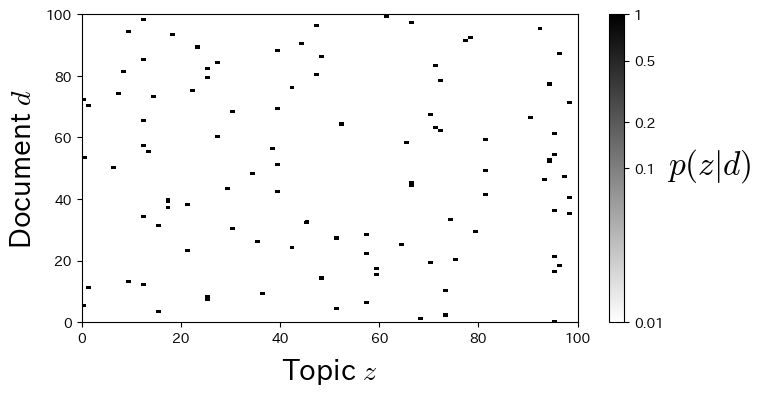

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/umplot.py model/um.jawiki.K100

### 5.2.1 トピックの解釈と自己相互情報量

In [ ]:
# トピック単語確率 p(w|k) を使ったトピック上位語 (トピック1の場合)
# ぼんやり教育に関係していることはわかるが、一般的に確率の高い語が上位に来ることになる
!umshow-naive.py model/um.jawiki.K100 1

Topic[1]: weight = 3.62 (nk = 84, p = 0.036)
学校        0.046
年          0.043
高等        0.020
月          0.017
県          0.017
教育        0.015
日          0.014
大学        0.014
市          0.014
県立        0.010
日本        0.010
会          0.008
鉄道        0.008
部          0.007
東京        0.007


In [ ]:
# 自己相互情報量(PMI)を使ったトピック上位語 (トピック1の場合)
# トピック(教育)により関係の深い語がとれるが、確率が低い語にバイアスされた結果になる
!umshow-pmi.py model/um.jawiki.K100 1

Topic[1]: weight = 3.62 (nk = 84, p = 0.036)
國學        4.180
甲南        3.948
中等        3.924
ジオ        3.920
大學        3.893
諏訪        3.872
師範        3.872
県立        3.834
教員        3.818
会津        3.803
旧制        3.771
佐伯        3.679
洋画        3.649
豊橋        3.640
中学        3.615


In [ ]:
# 正規化自己相互情報量(NPMI)を使ったトピック上位語 (トピック1の場合)
# トピック(教育)に関係の深い語で、かつ頻度も低すぎない語を[-1,1]の範囲のNPMIとしてとり出すことができる
!umshow.py model/um.jawiki.K100 1

Topic[1]: weight = 4.15 (nk = 84, p = 0.041)
学校        0.505
高等        0.462
県立        0.453
教育        0.412
鹿児島      0.407
教員        0.394
師範        0.393
鑑定        0.393
徳島        0.384
國學        0.383
会津        0.383
中等        0.382
旧制        0.382
諏訪        0.381
ボランティア 0.379


### 5.2.3 UMのベイズ学習

In [ ]:
!bum.py

bum: Bayesian Unigram Mixtures.
usage: % bum.py OPTIONS train{.dat,.lex} model
OPTIONS:
-K mixtures   number of mixtures
-N iters      number of MCMC iterations (default 100)
[-e eta]      eta hyperparameter (default 0.01)
[-g gamma]    gamma hyperparameter (default 1)
[-h]          displays this help
$Id: bum.py,v 1.11 2023/03/15 02:58:54 daichi Exp $


In [ ]:
# GibbsサンプリングによるUMのベイズ学習。MCMCの繰り返し数を大きめに50としているため、
# この学習には10分ほどかかります。
!bum.py -K 100 -N 5 data/jawiki model/bum.jawiki.K100N50

UM: 10000 documents, 7509 words in vocabulary.
iter[ 1] : PPL = 24.58 (change=99.0%)
iter[ 2] : PPL = 17.87 (change=95.5%)
iter[ 3] : PPL = 17.93 (change=42.4%)
iter[ 4] : PPL = 17.60 (change=15.8%)
iter[ 5] : PPL = 17.58 (change=9.4%)
Number of documents on topics:
[85, 8, 13, 12, 108, 8, 4, 48, 338, 51, 356, 51, 21, 70, 6, 10, 47, 21, 14, 15, 4, 7, 5, 541, 69, 20, 9, 5, 4, 4, 103, 470, 8, 12, 15, 305, 7, 8, 172, 19, 16, 24, 11, 32, 73, 15, 82, 73, 16, 10, 4, 11, 7, 731, 14, 5, 30, 19, 60, 53, 34, 3, 422, 1936, 9, 45, 14, 15, 198, 5, 10, 32, 15, 17, 22, 4, 9, 26, 20, 301, 37, 57, 322, 12, 9, 38, 65, 6, 17, 14, 63, 266, 22, 67, 147, 255, 3, 1192, 6, 6]
saving model to model/bum.jawiki.K100N50.. done.


In [ ]:
!umshow.py model/bum.jawiki.K100N100

Topic[1]: weight = 4.19 (nk = 5, p = 0.042)
技能        0.677
職業        0.610
能力        0.592
検定        0.590
コンクリート 0.588
合格        0.586
資格        0.571
施工        0.570
ガラス      0.555
ブロック    0.555
試験        0.552
学科        0.536
士          0.531
実施        0.514
協会        0.499
------
Topic[2]: weight = 2.01 (nk = 35, p = 0.020)
廃園        0.575
ジム        0.540
ボクシング  0.533
幼稚        0.530
ボクサー    0.522
王者        0.519
園          0.468
フライ      0.453
韓          0.433
韓国        0.427
取ら        0.418
キック      0.417
ヨン        0.412
級          0.412
アイドル    0.409
------
Topic[3]: weight = 1.75 (nk = 15, p = 0.018)
シングルス  0.638
ダブルス    0.602
ATP         0.573
テニス      0.570
ランキング  0.565
ゴルファー  0.546
ストローク  0.542
自己        0.534
ツアー      0.533
勝          0.528
挙げ        0.505
左利き      0.496
男子        0.495
ゴルフ      0.493
卓球        0.480
------
Topic[4]: weight = 0.86 (nk = 17, p = 0.009)
学校        0.624
立          0.623
奥多摩      0.613
小          0.606
公立        0.588
閉校        0.561
長崎       

## 5.3 ディリクレ混合モデル (DM)

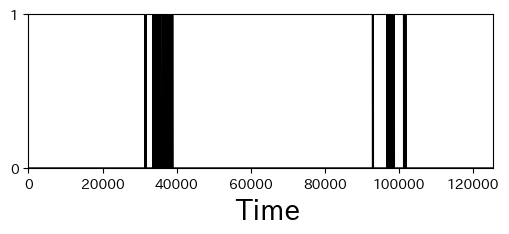

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/holmes.py data/holmes.txt lestrade

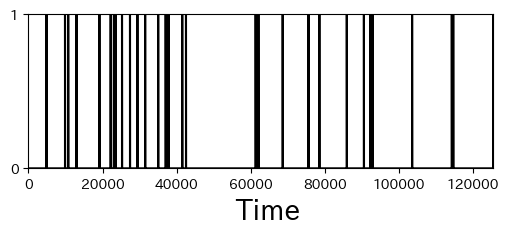

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/holmes.py data/holmes.txt interest

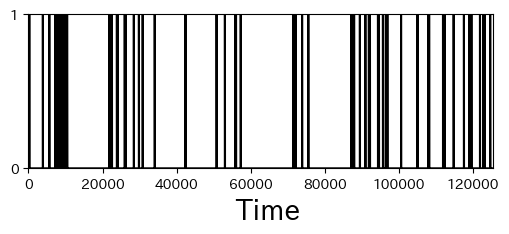

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/holmes.py data/holmes.txt woman

In [ ]:
!cut -f2 data/livedoor.txt > data/livedoor.nolabel.txt
!recur.py data/livedoor.nolabel.txt バンク

[[ 123   97]
 [ 138 7009]]


DMの学習

In [ ]:
!curl -O http://chasen.org/~daiti-m/dist/dm/dm-0.2.tar.gz
!tar xvfz dm-0.2.tar.gz
%cd dm-0.2
!make

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9395  100  9395    0     0  29386      0 --:--:-- --:--:-- --:--:-- 29359
dm-0.2/
dm-0.2/dm.c
dm-0.2/loo.h
dm-0.2/writer.c
dm-0.2/util.c
dm-0.2/gamma.c
dm-0.2/feature.h
dm-0.2/Makefile
dm-0.2/likelihood.h
dm-0.2/learn.h
dm-0.2/dmatrix.h
dm-0.2/loo.c
dm-0.2/dm.h
dm-0.2/util.h
dm-0.2/gamma.h
dm-0.2/writer.h
dm-0.2/feature.c
dm-0.2/dmatrix.c
dm-0.2/learn.c
dm-0.2/likelihood.c
/content/dm-0.2
gcc -c -Wall -O3 dm.c
gcc -c -Wall -O3 learn.c
gcc -c -Wall -O3 loo.c
gcc -c -Wall -O3 writer.c
gcc -c -Wall -O3 likelihood.c
gcc -c -Wall -O3 feature.c
gcc -c -Wall -O3 gamma.c
gcc -c -Wall -O3 dmatrix.c
gcc -c -Wall -O3 util.c
gcc -Wall -O3 -o dm dm.o learn.o loo.o writer.o likelihood.o feature.o gamma.o dmatrix.o util.o -lm


In [ ]:
!./dm -M 20 ../data/livedoor.dat ../model/dm.livedoor.M20

number of documents   = 7367
number of words       = 16945
number of mixtures    = 20
convergence criterion = 0.001 %
iteration 11/50..	PPL = 1594.55	
converged. [ 0:00:32]
writing model..
done.


In [ ]:
%cd ..

/content


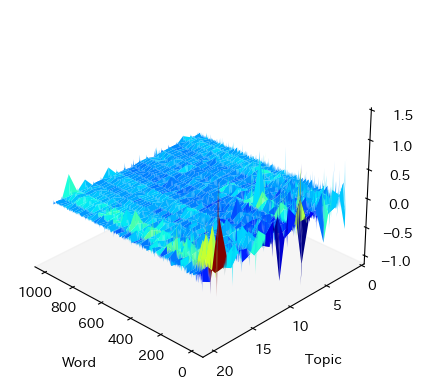

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/dmshow.py model/dm.livedoor.M20.alphas

### 5.3.2 ポリア分布と単語のバースト性

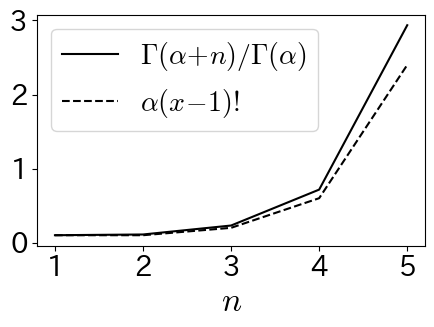

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/apoch.py 0.1 5

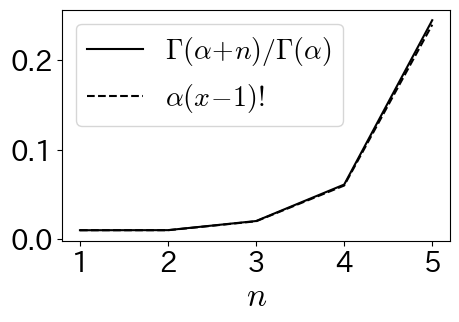

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bin/apoch.py 0.01 5

## 5.4 潜在ディリクレ配分法 (LDA)

In [ ]:
!curl -O http://chasen.org/~daiti-m/dist/lda-python/lda.py-0.3.tar.gz
!tar xvfz lda.py-0.3.tar.gz
%cd lda.py-0.3
!make

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23711  100 23711    0     0  51448      0 --:--:-- --:--:-- --:--:-- 51433
lda.py-0.3/
lda.py-0.3/lda.py
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
lda.py-0.3/index.html
lda.py-0.3/Makefile
lda.py-0.3/ldac.pyx
lda.py-0.3/setup.py
lda.py-0.3/opts.py
lda.py-0.3/train
lda.py-0.3/loggings.py
lda.py-0.3/fmatrix.py
/content/lda.py-0.3
./setup.py build_ext --inplace 
Compiling ldac.pyx because it changed.
[1/1] Cythonizing ldac.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/lda.py-0.3/ldac.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /usr/local/lib/python3.11/dist-packages/numpy/_core/inclu

In [ ]:
!./lda.py

usage: % lda.py OPTIONS train model [lexicon]
OPTIONS
 -K topics  number of topics in LDA
 -N iters   number of Gibbs iterations (default 1)
 -a alpha   Dirichlet hyperparameter on topics (default auto)
 -b beta    Dirichlet hyperparameter on words (default auto)
 -h         displays this help
$Id: lda.py,v 1.20 2023/06/22 02:01:27 daichi Exp $


In [ ]:
!./lda.py -K 50 -N 400 ../data/livedoor.dat ../model/lda.livedoor.K50 ../data/livedoor.lex

LDA: K = 50, iters = 400, alpha = 1, beta = 0.01
loading data.. documents = 7367, lexicon = 16946, nwords = 1838414
initializing.. done.
Gibbs iteration [400/400] PPL = 750.58 (joint=3417.74) alpha=0.037 beta=0.025
saving model to ../model/lda.livedoor.K50 .. 
including dictionary.
done.


In [ ]:
!ldashow.py ../model/lda.livedoor.K50

topic [1]
画面	0.0210
表示	0.0186
設定	0.0165
ファイル	0.0140
クリック	0.0124
得	0.0119
入力	0.0119
知っ	0.0114
Facebook	0.0096
便利	0.0090
虎の巻	0.0088
登録	0.0088
ページ	0.0085
編集	0.0077
PC	0.0077
------------------
topic [2]
賞	0.0418
映画	0.0372
作品	0.0210
監督	0.0207
受賞	0.0153
祭	0.0124
アカデミー	0.0120
日	0.0120
回	0.0116
第	0.0110
女優	0.0103
年	0.0102
作	0.0101
日本	0.0100
主演	0.0095
------------------
topic [3]
料理	0.0301
食べ	0.0174
店	0.0123
野菜	0.0116
味	0.0089
ビール	0.0082
食	0.0078
レシピ	0.0075
鍋	0.0074
メニュー	0.0073
女子	0.0071
食べる	0.0071
酒	0.0066
円	0.0056
食事	0.0053
------------------
topic [4]
ビデオ	0.0382
話題	0.0264
SALON	0.0262
記事	0.0175
月	0.0138
号	0.0116
第	0.0115
回	0.0105
編集	0.0085
関連	0.0081
チェック	0.0081
作品	0.0080
売れ筋	0.0073
最新	0.0066
連載	0.0065
------------------
topic [5]
人	0.0371
時間	0.0160
多い	0.0137
メール	0.0112
自分	0.0097
気	0.0084
携帯	0.0080
電話	0.0079
使っ	0.0077
中	0.0075
仕事	0.0065
時	0.0064
利用	0.0054
必要	0.0054
使う	0.0050
------------------
topic [6]
Ultrabook	0.0279
募集	0.0262
レ	0.0245
ビューアー	0.0238
レビュー	0.0211
製品	0.0158
日	0.0134
PC	0.0127

/content


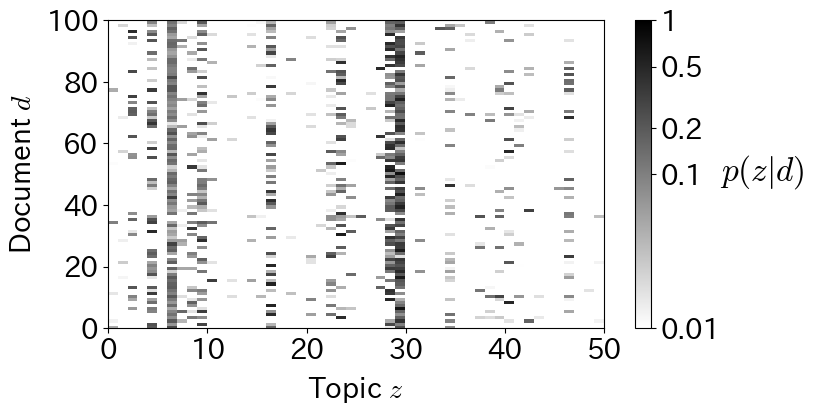

<Figure size 640x480 with 0 Axes>

In [ ]:
%cd ..
%run bin/ldaplot.py model/lda.livedoor.K50

### 5.4.4 トピックモデルの評価と拡張

In [ ]:
!coherence.py model/um.jawiki.K100 data/ja.text8.txt

obtaining topic words..
computing cooccurrences..
calculating coherence..
average = -0.0883


In [ ]:
!coherence.py model/bum.jawiki.K100N100 data/ja.text8.txt

obtaining topic words..
computing cooccurrences..
calculating coherence..
average = -0.0793


## 5.5 ニューラル文書モデルと独立成分分析

In [ ]:
!docvec.py

usage: docvec.py OPTIONS train model
$Id: docvec.py,v 1.2 2023/12/16 14:51:51 daichi Exp $
OPTIONS
-K dimenstions  number of document vector dimensions
-R              also compute regression matrix
-d dict         dictionary of id -> word mapping
-h              displays this help


In [ ]:
!docvec.py -K 200 -d data/livedoor.lex data/livedoor.dat model/model.docvec

using dictionary: data/livedoor.lex
data/livedoor.dat: K = 200, output = model/model.docvec
parsing data..
creating sparse matrix..
computing data vectors..
done.
writing model to model/model.docvec..
done.


In [ ]:
!docvec-similar.py model/model.docvec data/livedoor.txt 200

loading model from model/model.docvec.. done.
 1.0000	dokujo-tsushin 30歳を過ぎた大人の肌へ、世界が認めた美容液「」
 0.6536	dokujo-tsushin 女性も驚愕!?スキンケアしていない人は70%と男
 0.6530	peachy         あなたの見た目年齢を上げているのは“シミ”だった
 0.6492	peachy         自宅でできるでふっくらお肌を目指そう!毎朝のメイ
 0.6315	peachy         日本初!DHC、“10倍濃度”のQ10シリーズを
 0.6148	kaden-channel  ライオン、毛と音波振動でくすみを落とす「プラチア
 0.6104	peachy         男性の4割が“すっぴん”にがっかり!最強のすっぴ
 0.5819	peachy         “究極のクリーム”で10年後も20年後もずっと綺
 0.5565	peachy         「そのガサガサませんわ!」大人気“美肌一族”シリ
 0.5549	dokujo-tsushin お肌に優しいから安心紫外線が気になる独女の夏の対
 0.5489	dokujo-tsushin 驚異の力を持ったで夏こそ肌に潤いを!!本格的な夏
 0.5450	dokujo-tsushin 本当はなりたい「すっぴん美人」このところ、すっか
 0.5398	dokujo-tsushin ブロガーから大きな支持を得たとはお肌の悩みは歳を
 0.5195	peachy         俳優がプロデュース!肌の巡りをアップさせる韓国コ
 0.5156	peachy         女性を新たな注目ワードは“アミノ酸”8月も残すと


In [ ]:
# 回帰行列Rも含めてモデルを計算する
!docvec.py -K 200 -R -d data/livedoor.lex data/livedoor.dat model/model.docvec-R

using dictionary: data/livedoor.lex
data/livedoor.dat: K = 200, output = model/model.docvec-R
parsing data..
creating sparse matrix..
computing data vectors..
computing regression matrix..
done.
writing model to model/model.docvec-R..
done.


In [ ]:
!docvec-search.py model/model.docvec-R data/livedoor.txt 映画 東京

loading model from model/model.docvec-R.. done.
keyword: 映画 東京
 0.0176	peachy         【スナップレポート】東京ガールズコレクション2011土
 0.0168	peachy         【スナップレポート】東京ガールズコレクション2011水
 0.0154	movie-enter    食べて、で、映画を観れる『東京ごはん映画祭』が今年も開
 0.0153	peachy         【スナップレポート】東京ガールズコレクション2011藤
 0.0150	movie-enter    三池監督が映画『一命』について「満島ひかりがいろんな意
 0.0150	movie-enter    基礎から勉強しよう!初心者でもわかる「東京国際映画祭」
 0.0148	peachy         「映画祭を創る、女性たち。」vol.4森下美香さん第2
 0.0148	peachy         「映画祭を創る、女性たち。」vol.1会場運用・調整山
 0.0146	livedoor-homme “食”をテーマにしたまったく新しいフェスが誕生!昨今の
 0.0145	peachy         第23回は“飛躍”の東京国際映画祭に秋といえば、食・ス
 0.0143	peachy         【スナップレポート】東京ガールズコレクション2011佐
 0.0143	peachy         【スナップレポート】東京ガールズコレクション2011佐
 0.0141	movie-enter    小栗旬は“使えない若者”、映画『キツツキと雨』の特報映
 0.0139	movie-enter    この夏、東京スカイツリーが映画に2008年7月のから、
 0.0138	movie-enter    小栗旬がゾンビ映画を手掛ける?必見の予告映像が公開第2


In [ ]:
!docvec-search.py model/model.docvec-R data/livedoor.txt コスメ 春

loading model from model/model.docvec-R.. done.
keyword: コスメ 春
 0.0136	peachy         いい香りで食べちゃいそう!肌も美味しい美白コスメに注目
 0.0130	peachy         韓方の力で乾燥知らずの肌へ!この秋注目の韓方コスメ心地
 0.0130	peachy         機能だけじゃつまらない!かわいさ満点のガーリーな韓国コ
 0.0129	peachy         思わずパッケージ買いしたくなる!韓国の可愛いリップクリ
 0.0129	peachy         高級キャビアを配合したコスメ!?韓国コスメの新たな定番
 0.0127	peachy         [たて現地情報]BBクリームは夏のマストアイテム!限定
 0.0126	peachy         2011年は「新・」にトレンドの予感あり!2010年は
 0.0126	peachy         優れた肌再成効果を発揮、韓国で話題の「かたつむりクリー
 0.0125	peachy         ダイヤモンドを使った「宝石化粧品」が登場、韓国コスメの
 0.0124	peachy         彼にあげたい韓国メンズコスメ、韓流俳優のような美肌男へ
 0.0124	peachy         [たて現地情報]気になる話題の韓国コスメ、各ブランドの
 0.0124	peachy         注射器に試験管!?韓国の医療用品型コスメでアンチエイジ
 0.0124	peachy         俳優がプロデュース!肌の巡りをアップさせる韓国コスメ最
 0.0123	peachy         韓国コスメの本領発揮!?ピンク色で上品な華やかさをプラ
 0.0123	peachy         パッケージがかわいい韓国コスメ、毎日のお手入れやメイク


In [ ]:
!docvec-search.py model/model.docvec-R data/livedoor.txt 知識

loading model from model/model.docvec-R.. done.
keyword: 知識
 0.0137	kaden-channel  iPhoneに差すだけ、はんだづけ不用、3500円の空
 0.0131	kaden-channel  さまざまな「線量計」、本来の機能についておさらいしてみ
 0.0130	kaden-channel  「個人被ばく線量計」の機能についておさらいしてみよう【
 0.0127	kaden-channel  【ガイガーカウンター特集】これなら手が届く!2万円以下
 0.0124	kaden-channel  スマホで熱中症を避ける【デジ通】連日、熱中症による病院
 0.0124	kaden-channel  「表面汚染検査計」ってなに?【ガイガーカウンター特集:
 0.0120	kaden-channel  放射線計測の基礎知識をおさらいしてみよう【ガイガーカウ
 0.0119	kaden-channel  熱中症予防のポイント—水分補給のコツ【豆知識】家電チャ
 0.0118	kaden-channel  おすすめAndroidアプリ・ベスト5(仕事効率化編)
 0.0116	kaden-channel  読書の夏!洋書好きにKindleがオススメな理由【デジ
 0.0115	kaden-channel  おすすめAndroidアプリ・ベスト5(日常編)【デジ
 0.0115	kaden-channel  【夏休み特集】読書感想文にスマホを活用するお盆休みを迎
 0.0111	kaden-channel  国内で保証対応、9800円は魅力的!—ガイガーFUKU
 0.0108	kaden-channel  スマホでゲリラ豪雨に備える【デジ通】暑い夏が戻り、同時
 0.0104	kaden-channel  もう、で猛暑を乗り切れ!アイスクリームメーカー特集各地


tf.idfと単語の重みづけ

In [ ]:
# dfとidfを計算する (idf=単語の重み)
!tfidf.py data/livedoor | head -20

word      	df        	idf       
----------------------------------------
日         	0.694177	0.365029
人         	0.574589	0.554100
月         	0.532510	0.630154
年         	0.508348	0.676589
中         	0.498168	0.696819
関連        	0.483915	0.725847
記事        	0.470884	0.753144
的         	0.442785	0.814670
者         	0.333514	1.098069
日本        	0.322791	1.130751
今回        	0.317225	1.148143
情報        	0.316683	1.149856
自分        	0.316140	1.151572
時         	0.315325	1.154151
一         	0.305959	1.184304
見         	0.276096	1.287006
今         	0.274739	1.291935
話題        	0.273381	1.296888
Traceback (most recent call last):
  File "/content/bin/tfidf.py", line 59, in <module>
    main ()
  File "/content/bin/tfidf.py", line 51, in main
    tfidf (data, dic)
  File "/content/bin/tfidf.py", line 30, in tfidf
    print ('%-10s\t%.6f\t%.6f' % (dic[v], val, -log(val)))
BrokenPipeError: [Errno 32] Broken pipe


In [ ]:
# dfとidfを計算して、ランダムな20語をidfでソートして表示
!tfidf.py data/livedoor | shuf | head -20 | sort -k3 -n

全国        	0.111443	2.194243
活用        	0.058776	2.834028
発言        	0.057825	2.850327
与え        	0.047509	3.046833
未来        	0.034342	3.371376
良かっ       	0.022261	3.804899
省         	0.015203	4.186267
結成        	0.011809	4.438858
収め        	0.007601	4.879414
スゴイ       	0.007194	4.934474
病         	0.006380	5.054618
頂く        	0.005565	5.191194
主体        	0.003801	5.572561
増設        	0.002036	6.196716
導き出し      	0.001900	6.265709
広範囲       	0.001900	6.265709
SKE       	0.001629	6.419859
ガラスマ      	0.000814	7.113006
起床        	0.000814	7.113006
八戸        	0.000271	8.211619


### 5.5.2 文書ベクトル/単語ベクトルの解釈

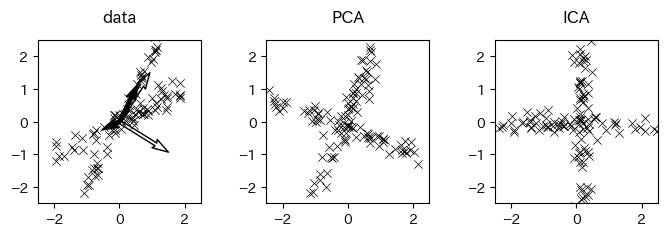

<Figure size 640x480 with 0 Axes>

In [34]:
# PCAとICAの比較のデモ (図5.36)
%run bin/scatter.py

In [36]:
from sklearn.decomposition import FastICA
from scipy.stats import skew
import numpy as np
def ica (X):
    X = X - np.mean (X, axis=0)
    analyzer = FastICA (whiten="arbitrary-variance")
    S = analyzer.fit_transform (X)
    A = analyzer.components_
    # sort by skewness
    N,D = S.shape
    skews = np.abs (skew (S, axis=0))
    index = map (lambda x: x[1],
                 sorted (zip(skews, np.arange(D)),
                         key = lambda x: x[0], reverse=True))
    return S[:,list(index)]

In [42]:
# ICAによる単語ベクトルの変換。結果は毎回乱数のため少しずつ異なるので、注意が必要です。
!icavec.py model/wordvec.livedoor.K100 model/wordvec.livedoor.K100.ica

loading from "model/wordvec.livedoor.K100".. done.
analyzing ICA.. done.
writing to model/wordvec.livedoor.K100.ica.. done.


In [43]:
!head -10 model/wordvec.livedoor.K100.ica

訪朝	-0.0004390 -0.0004318 -0.0004949 -0.0007340 -0.0006035  0.0004197  0.0000720  0.0011131 -0.0006884 -0.0000337 -0.0001264  0.0002227  0.0001877 -0.0007131 -0.0005732 -0.0003817 -0.0011019 -0.0016489  0.0007245 -0.0004139 -0.0010468 -0.0007690 -0.0038337 -0.0004466 -0.0002390 -0.0017388  0.0003322 -0.0004050 -0.0013438  0.0004599 -0.0002863 -0.0005096  0.0002691  0.0002761  0.0007820  0.0013600 -0.0010718  0.0007880 -0.0006565 -0.0011058  0.0001804 -0.0004569  0.0002475 -0.0009223 -0.0006891 -0.0004150  0.0000226  0.0007267  0.0005302  0.0000919  0.0004518  0.0000099  0.0000027 -0.0001165  0.0001122  0.0017342  0.0010745  0.0007600  0.0019194  0.0002799  0.0008275 -0.0007225 -0.0022027  0.0002430 -0.0005880  0.0003966 -0.0002417 -0.0011402  0.0003492 -0.0010910 -0.0006833 -0.0002475 -0.0002175 -0.0011133  0.0009974  0.0005377 -0.0017216 -0.0007255 -0.0000187 -0.0036519  0.0008472  0.0002576 -0.0007070  0.0016870  0.0024191 -0.0014960 -0.0014244 -0.0012376  0.0007471  0.0007573 -0.0014

In [47]:
# ICAの3次元目。Android関係の単語を表す軸になっています。
!awk '{print $1,$4}' model/wordvec.livedoor.K100.ica | sort -k2 -nr | head -15 | awk '{printf("%-12s %.4f\n",$1,$2)}'

apps         0.2363
store        0.2362
details      0.2361
play         0.2300
google       0.2298
要件       0.2225
ANDROID      0.2186
id           0.2118
Play         0.2008
com          0.1912
Store        0.1798
カテゴリ 0.1681
バージョン 0.1552
http         0.1453
Google       0.1287


In [53]:
# 3次元目の逆側は、iPhone関係の単語になっています。つまり3次元目は、Android<->iPhoneの軸を表していることがわかります。
!awk '{print $1,$4}' model/wordvec.livedoor.K100.ica | sort -k2 -n | head -15 | awk '{printf("%-12s %.4f\n",$1,$2)}'

iPhone       -0.0222
クリック -0.0185
ブック    -0.0162
術          -0.0162
電子       -0.0158
アップ    -0.0152
サイト    -0.0148
携帯       -0.0141
既報       -0.0135
背面       -0.0134
ライフ    -0.0123
快適       -0.0122
iPad         -0.0122
Explorer     -0.0121
レポート -0.0121


In [50]:
# ICAの軸の9次元目。インターネット関係の単語が集まっています。
!awk '{print $1,$10}' model/wordvec.livedoor.K100.ica | sort -k2 -n | head -15 | awk '{printf("%-12s %.4f\n",$1,$2)}'

インターネット -0.0165
サイト    -0.0152
使い方    -0.0144
メモリー -0.0140
Sysinternals -0.0136
TechCenter   -0.0136
都内       -0.0134
専用       -0.0133
クラ       -0.0126
トップページ -0.0123
読む       -0.0123
活動       -0.0120
経由       -0.0118
ブラウザ -0.0118
ウド       -0.0118


In [51]:
# ICAの軸の「反対側」に必ずしも意味があるとは限りません。
!awk '{print $1,$10}' model/wordvec.livedoor.K100.ica | sort -k2 -nr | head -15 | awk '{printf("%-12s %.4f\n",$1,$2)}'

利夫       0.1895
Copyright    0.1880
エヌプラス 0.1878
rights       0.1868
reserved     0.1868
奈知       0.1841
ジャム    0.1836
虎の巻    0.1832
池田       0.1814
岡本       0.1721
All          0.1674
ハウス    0.1647
Excel        0.1629
ワザ       0.1595
知っ       0.1591


In [52]:
# ICAの10次元目。本文の「いちおう妖ヶ劇場」の例
# 参考: http://blog.livedoor.jp/sato_mafuyu/archives/cat_187532.html
!awk '{print $1,$11}' model/wordvec.livedoor.K100.ica | sort -k2 -nr | head -15 | awk '{printf("%-12s %.4f\n",$1,$2)}'

妖          0.2594
ヶ          0.2562
巻          0.2315
劇場       0.1994
勅使河原 0.1990
妖怪       0.1966
栄華       0.1959
仙人       0.1899
お嬢様    0.1693
ネコ       0.1588
話          0.1492
次          0.1431
アパート 0.1362
住む       0.1222
貧乏       0.1206
